# Nernst实验数据分析

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os

### 读取数据

In [14]:
# 选择数据文件夹和文件，定义热电偶换算系数
# =========================================
folder = "C:\\Users\\USTC\\Desktop\\anedata\\Co1-102"
# T type thermocouple
thermo_coe = 41e-6  
sample_name = "Co1-102(op)"
# =========================================

# 遍历文件夹下的所有文件
for root, dirs, files in os.walk(folder):
    for file in files:
        if sample_name in file:
            if "thermocouple" in file:
                temp_path = os.path.join(root, file)
            else:
                scan_path = os.path.join(root, file)
            
scan_data = np.loadtxt(scan_path)
temp_data = np.loadtxt(temp_path)

# 输出数据文件，检查数据文件是否正确
print(scan_path)
print(temp_path)

C:\Users\USTC\Desktop\anedata\Co1-102\20240406_Co1-102(op).txt
C:\Users\USTC\Desktop\anedata\Co1-102\thermocouple_20240406_Co1-102(op).txt


### 计算温差

26.280341448853658


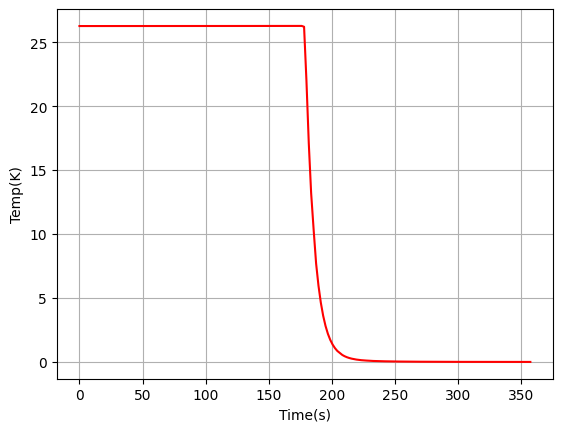

In [15]:
t = temp_data[:,0]-temp_data[0,0]
volt = temp_data[:,1]

temp = volt/thermo_coe

plt.xlabel("Time(s)")
plt.ylabel("Temp(K)")
plt.grid()
plt.plot(t, temp, 'r')

# 利用起始的若干个数据和最后的若干个数据计算温差
delta_T = np.abs(np.mean(temp[-5:]-temp[:5]))
print(delta_T)

### 计算 $S_{xy}$

$\nabla V = -S\nabla T$ 

$S_{yx} = -\frac{\partial V}{\partial y} / \frac{\partial T}{\partial x}$

$S_{yx} = -\frac{\Delta V}{W} / \frac{\Delta T}{L}$

$S_{xy} = -\frac{L\Delta V}{W\Delta T} $


slope= 2.1891970516902514e-12 V/K/Oe
S_ANE = 2.427983060915869e-07 V/K


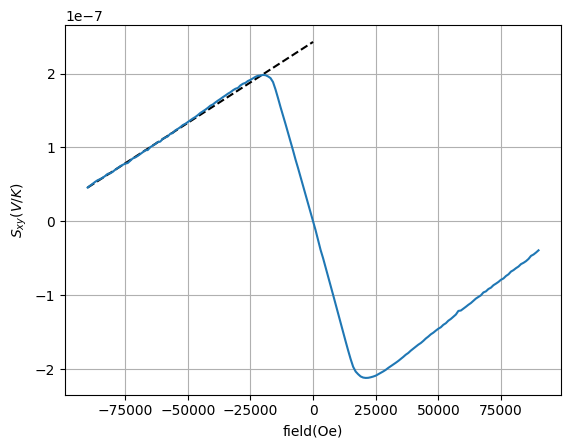

In [16]:
# sample geometry
# Co0001: L=1.84mm, W=1.58mm
# Co11-20: L=null, W=null
# Co1-102: L=3.01mm, W=1.86mm
# =========================================
length = 3.01e-3
width = 1.86e-3
# =========================================

data_len = len(scan_data)
field = scan_data[:data_len//2, 1]
# 来回数据取平均
volt = (scan_data[:data_len//2, 2] + np.flipud(scan_data[data_len//2:, 2])) / 2

# 分离奇分量和偶分量
# volt_even = (volt + np.flipud(volt)) / 2
# volt_odd = (volt - np.flipud(volt)) / 2

# 零场处的值设为offset
zero_field_i = np.argmax(field==0)
offset = volt[zero_field_i]

# 计算Sxy（注意正负号）
# =========================================
S_xy = -(volt - offset) * length / delta_T / width
# =========================================

# 拟合截距和斜率
fit_x = field[field<=-50000]
fit_y = S_xy[:len(fit_x)]
coe = np.polyfit(fit_x, fit_y, 1)

plt.xlabel("field(Oe)")
plt.ylabel("$S_{xy}(V/K)$")
plt.grid()

plt.plot(field[field<=0], coe[0]*field[field<=0]+coe[1], "k--")
plt.plot(field, S_xy)

print("slope=", coe[0], 'V/K/Oe')
print("S_ANE =", coe[1], "V/K")

content = np.vstack((field, S_xy))
np.savetxt(sample_name+"_Sxy.dat", content.T)